D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0. 1.], y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


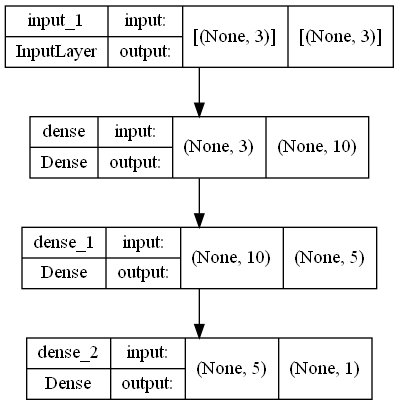

In [1]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Input
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from keras.utils.vis_utils import plot_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import argparse
import locale
import os

seed = 246

# model-compile parameter sets
model_metrics = 'acc'
epochs = 500
batchs = 64
splits = 0.2
lr        = 3e-4
input_dim = 3
opt = Adam(learning_rate=lr,decay=3e-4/200)

concatenated_df=pd.read_csv("oriP_extraFeatures_Geo.csv")
XY = concatenated_df.values
for i in range(10):
    np.random.shuffle(XY)
X = XY[:,[0,2,3]]
Y = XY[:,[5]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=splits, random_state=seed)

model = Sequential()
inputShape=(input_dim,)
model.add(Input(shape=inputShape))
x = Dense(10,activation="relu", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(model.output)
x = Dense(5,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
# x = Dense(5,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
x = Dense(1,activation ="sigmoid", kernel_initializer="RandomNormal", bias_initializer="RandomNormal")(x)
model = Model(inputs=[model.input],outputs=x)
model.compile(loss="mse",optimizer=opt,metrics=['acc'])

y_train = y_train.flatten()
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(zip(np.unique(y_train),class_weights))

plot_model(model,to_file='FeaturesPlots/model.png',show_shapes=True)

In [2]:
history = model.fit(x=[x_train],y=y_train, validation_data=([x_test], y_test), 
                    epochs=epochs, batch_size=batchs, class_weight=class_weights)

model.save_weights(r'weightANDlearningcurve/GeoPModule_model_3layer.h5')
eval_model=[]
eval_model.append(model.evaluate([x_test], y_test)[1])
print("\nTest Accuracy: %.4f" % eval_model[0])

Epoch 1/500
10500/10500 [==============================] - 11s 977us/step - loss: 0.1573 - acc: 0.6964 - val_loss: 0.1108 - val_acc: 0.8754
Epoch 2/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.1053 - acc: 0.8805 - val_loss: 0.0883 - val_acc: 0.8922
Epoch 3/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0887 - acc: 0.8943 - val_loss: 0.0844 - val_acc: 0.8975
Epoch 4/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0803 - acc: 0.9032 - val_loss: 0.0801 - val_acc: 0.9007
Epoch 5/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0787 - acc: 0.9047 - val_loss: 0.0822 - val_acc: 0.8993
Epoch 6/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0783 - acc: 0.9050 - val_loss: 0.0757 - val_acc: 0.9044
Epoch 7/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0782 - acc: 0.9047 - val_loss: 0.0716 - val_acc: 0.9105
Epoch 8/500
10500/10500 [=======

Epoch 60/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9038 - val_loss: 0.0755 - val_acc: 0.9065
Epoch 61/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9048 - val_loss: 0.0726 - val_acc: 0.9081
Epoch 62/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9044 - val_loss: 0.0819 - val_acc: 0.8985
Epoch 63/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9046 - val_loss: 0.0773 - val_acc: 0.9029
Epoch 64/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9042 - val_loss: 0.0830 - val_acc: 0.8977
Epoch 65/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9047 - val_loss: 0.0836 - val_acc: 0.8964
Epoch 66/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0779 - acc: 0.9042 - val_loss: 0.0742 - val_acc: 0.9065
Epoch 67/500
10500/10500 [=

Epoch 119/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9044 - val_loss: 0.0737 - val_acc: 0.9085
Epoch 120/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9051 - val_loss: 0.0745 - val_acc: 0.9071
Epoch 121/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9048 - val_loss: 0.0801 - val_acc: 0.9004
Epoch 122/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9045 - val_loss: 0.0738 - val_acc: 0.9082
Epoch 123/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9049 - val_loss: 0.0790 - val_acc: 0.9014
Epoch 124/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9046 - val_loss: 0.0757 - val_acc: 0.9060
Epoch 125/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0778 - acc: 0.9049 - val_loss: 0.0798 - val_acc: 0.9004
Epoch 126/500
10500/

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0777 - acc: 0.9054 - val_loss: 0.0747 - val_acc: 0.9077
Epoch 178/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0777 - acc: 0.9056 - val_loss: 0.0805 - val_acc: 0.9004
Epoch 179/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0777 - acc: 0.9052 - val_loss: 0.0725 - val_acc: 0.9093
Epoch 180/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0777 - acc: 0.9060 - val_loss: 0.0802 - val_acc: 0.9003
Epoch 181/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0776 - acc: 0.9046 - val_loss: 0.0748 - val_acc: 0.9074
Epoch 182/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0777 - acc: 0.9062 - val_loss: 0.0797 - val_acc: 0.9002
Epoch 183/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0776 - acc: 0.9050 - val_loss: 0.0813 - val_acc: 0.8989
Epoch 184/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9055 - val_loss: 0.0765 - val_acc: 0.9063
Epoch 236/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9062 - val_loss: 0.0763 - val_acc: 0.9043
Epoch 237/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9056 - val_loss: 0.0736 - val_acc: 0.9083
Epoch 238/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9059 - val_loss: 0.0754 - val_acc: 0.9074
Epoch 239/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9056 - val_loss: 0.0751 - val_acc: 0.9076
Epoch 240/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9060 - val_loss: 0.0768 - val_acc: 0.9043
Epoch 241/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0775 - acc: 0.9054 - val_loss: 0.0716 - val_acc: 0.9103
Epoch 242/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9061 - val_loss: 0.0774 - val_acc: 0.9040
Epoch 294/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9061 - val_loss: 0.0768 - val_acc: 0.9040
Epoch 295/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9058 - val_loss: 0.0785 - val_acc: 0.9029
Epoch 296/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9062 - val_loss: 0.0772 - val_acc: 0.9040
Epoch 297/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9053 - val_loss: 0.0747 - val_acc: 0.9084
Epoch 298/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9063 - val_loss: 0.0751 - val_acc: 0.9084
Epoch 299/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0774 - acc: 0.9056 - val_loss: 0.0775 - val_acc: 0.9040
Epoch 300/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9062 - val_loss: 0.0771 - val_acc: 0.9038
Epoch 352/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9062 - val_loss: 0.0772 - val_acc: 0.9038
Epoch 353/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9058 - val_loss: 0.0766 - val_acc: 0.9040
Epoch 354/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9066 - val_loss: 0.0784 - val_acc: 0.9036
Epoch 355/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0771 - acc: 0.9056 - val_loss: 0.0747 - val_acc: 0.9084
Epoch 356/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9063 - val_loss: 0.0731 - val_acc: 0.9097
Epoch 357/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0772 - acc: 0.9060 - val_loss: 0.0780 - val_acc: 0.9038
Epoch 358/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0760 - acc: 0.9069 - val_loss: 0.0749 - val_acc: 0.9094
Epoch 410/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0759 - acc: 0.9073 - val_loss: 0.0740 - val_acc: 0.9099
Epoch 411/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0759 - acc: 0.9073 - val_loss: 0.0753 - val_acc: 0.9094
Epoch 412/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0759 - acc: 0.9073 - val_loss: 0.0758 - val_acc: 0.9083
Epoch 413/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0759 - acc: 0.9075 - val_loss: 0.0746 - val_acc: 0.9099
Epoch 414/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0759 - acc: 0.9077 - val_loss: 0.0767 - val_acc: 0.9077
Epoch 415/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0758 - acc: 0.9078 - val_loss: 0.0779 - val_acc: 0.9077
Epoch 416/500
10500/10500 [=======

10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9106 - val_loss: 0.0813 - val_acc: 0.9080
Epoch 468/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0752 - acc: 0.9103 - val_loss: 0.0783 - val_acc: 0.9099
Epoch 469/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9105 - val_loss: 0.0804 - val_acc: 0.9087
Epoch 470/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9099 - val_loss: 0.0756 - val_acc: 0.9120
Epoch 471/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9106 - val_loss: 0.0775 - val_acc: 0.9099
Epoch 472/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9102 - val_loss: 0.0781 - val_acc: 0.9099
Epoch 473/500
10500/10500 [==============================] - 11s 1ms/step - loss: 0.0751 - acc: 0.9103 - val_loss: 0.0764 - val_acc: 0.9117
Epoch 474/500
10500/10500 [=======

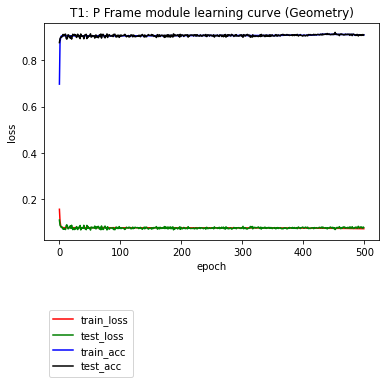

In [3]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.plot(history.history['acc'],color='b')
plt.plot(history.history['val_acc'],color='k')
plt.title('T1: P Frame module learning curve (Geometry)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'test_loss','train_acc', 'test_acc'], loc='upper left',bbox_to_anchor=(0,-0.3))
plt.savefig('FeaturesPlots/P_GeoTrainingCurve.jpg', bbox_inches='tight', dpi=1280)
plt.show()

import pickle
with open('weightANDlearningcurve/GeoPModule_history.txt', 'wb') as file_txt:
    pickle.dump(history.history, file_txt)

In [4]:
a_weight1=model.get_weights()[0]
a_bias1=model.get_weights()[1]
a_weight2=model.get_weights()[2]
a_bias2=model.get_weights()[3]
a_weight3=model.get_weights()[4]
a_bias3=model.get_weights()[5]


print("\na_weight1: ")
for a in a_weight1:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias1: ")
for a in a_bias1:
        print(a,end=",")
        
print("\n\na_weight2: ")
for a in a_weight2:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias2: ")
for a in a_bias2:
        print(a,end=",")

print("\n\na_weight3: ")
for a in a_weight3:
    for b in a:
        print(b,end=",")
        
print("\n\na_bias3: ")
for a in a_bias3:
        print(a,end=",")
        
# g_weight1=model.get_layer(index=0).get_weights()
# g_weight2=model.get_layer(index=1).get_weights()
        
# print(g_weight1)
# print(g_weight2)


a_weight1: 
0.012353099,0.07540668,0.31559834,-0.34462702,0.017790236,-0.4228825,-1.9886178,0.009936047,0.51436317,0.20596752,-0.078350395,0.0004419568,0.32493582,-0.33075443,-0.20536558,-0.40564656,-0.53745407,-0.010177308,0.48108375,-0.031197747,0.04525371,1.0528557,0.8927264,-0.35310692,1.0878196,-0.28975403,1.0588678,-0.0049620285,0.9115911,1.0453745,

a_bias1: 
-0.045188382,-0.40414637,-0.33867526,1.041629,-0.47520235,1.0472109,-0.48552042,-0.04169787,-0.3525877,-0.40262368,

a_weight2: 
-0.021404099,-0.004334454,-0.09017694,-0.038698506,0.035261657,0.66929114,1.0060097,2.3926668,-0.9861025,1.5492251,1.4015536,1.0600766,1.3433474,-1.1025758,1.0489533,-1.8896223,-1.5373876,-1.4779321,1.6782451,-1.1597179,0.4638042,1.2265643,2.9789612,-0.99853855,1.9114952,-2.0731692,-1.4647706,-1.322512,1.6771572,-1.0780103,1.1642246,2.12875,4.3004518,-1.8116593,3.0512428,0.0018526191,0.035219133,-0.011738876,-0.0017215088,-0.037245877,1.8719306,1.2492524,1.076403,-1.283438,0.9779111,0.84825516,1.